# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset 

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Information about the Dataset

In [5]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [6]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Target Column

In [7]:
housing['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
housing['target_names']

['MedHouseVal']

# Loading the Dataset as a Pandas Dataframe and adding the Target column to the dataframe

In [9]:
data = pd.DataFrame(housing['data'],columns=housing['feature_names'])
df = data.copy()
df['MedHouseVal'] = housing['target']

In [10]:
df['MedInc'] = df['MedInc'] * 10000

In [11]:
df['MedHouseVal'] = df['MedHouseVal'] * 100000

The median income is in 10 thousands so we multiply by 10K

The Median house value is in 100 thousands so we multiply it by 100K for simplicity

Showing Top 5 rows or records of the Data

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


Shape of the dataset shows 20640 rows and 9 columns including the target variable/dependent variable

In [13]:
df.shape

(20640, 9)

# Summary or Overview of the Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Observation: Here we see that all columns have same datatype ie. float64

# Checking for missing values and duplicates

In [15]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Here we see that there are no missing or nan values in the dataset

In [16]:
df.duplicated().sum()

0

Here we see that there are no duplicated in the dataset

# Statistics related to the data

In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,38706.710029,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,18998.217179,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,4999.000000,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,25634.000000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,35348.000000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,47432.500000,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,150001.000000,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


From the above table we can check the max column has very odd values such as 141 Ave rooms.

In [18]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

# Graphical Analysis of the data

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

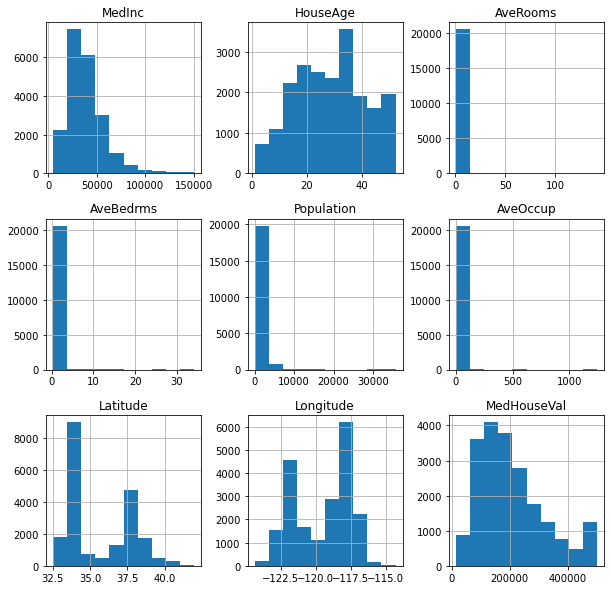

In [19]:
df.hist(figsize=(10,10))

The overview of the histogram of the columns shows that we have some outliers in AveRooms, AveBedrooms,Population and AveOccup

We can further analyse this using boxplots

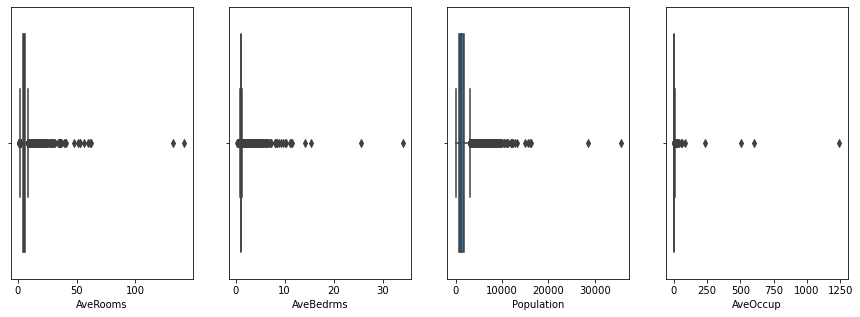

In [20]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
cols = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for i,j in enumerate(cols):
    sns.boxplot(df[j],ax = ax[i])

As we can see we have a lot of outliers. We can write a function to remove the outliers

In [21]:
def clean_outliers(data):
    iqr_ = 1.5 * (data.quantile(0.75) - data.quantile(0.25))
    lower_fence = data.quantile(0.25) - iqr_
    upper_fence = data.quantile(0.75) + iqr_
    clean_data = data[(data > lower_fence) & (data < upper_fence)]
    return clean_data

We create a copy of the dataset and remove outliers in the new dataset named clean_data

In [22]:
clean_data = df.copy()

In [23]:
clean_data['AveRooms'] = clean_outliers(clean_data['AveRooms'])
clean_data['AveBedrms'] = clean_outliers(clean_data['AveBedrms'])
clean_data['Population'] = clean_outliers(clean_data['Population'])
clean_data['AveOccup'] = clean_outliers(clean_data['AveOccup'])

In [24]:
clean_data.isnull().sum()

MedInc            0
HouseAge          0
AveRooms        511
AveBedrms      1424
Population     1198
AveOccup        711
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64

Now we need to deal with the missing values. We can drop the rows or we can impute the values

Here we will replace nan values with median of the respective features

In [25]:
#values = {'AveRooms':df['AveRooms'].median(),'AveBedrms':df['AveBedrms'].median(),'Population':df['Population'].median(),'AveOccup':df['AveOccup'].median()}
#clean_data = clean_data.fillna(value=values)
clean_data = clean_data.dropna(axis=0)

In [26]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17346 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       17346 non-null  float64
 1   HouseAge     17346 non-null  float64
 2   AveRooms     17346 non-null  float64
 3   AveBedrms    17346 non-null  float64
 4   Population   17346 non-null  float64
 5   AveOccup     17346 non-null  float64
 6   Latitude     17346 non-null  float64
 7   Longitude    17346 non-null  float64
 8   MedHouseVal  17346 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


Now that the outliers and missing values are dealt with we will now again analyze the distribution of the data

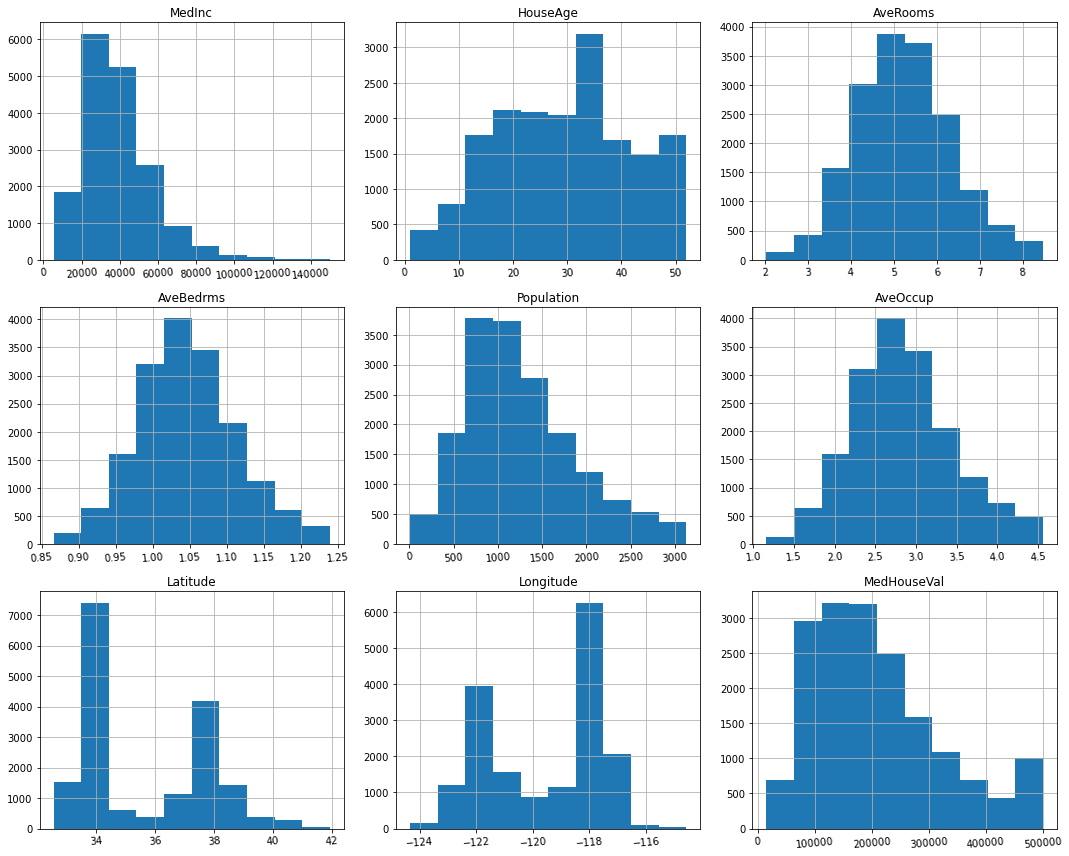

In [27]:
clean_data.hist(figsize=(15,12),xrot=5)
plt.tight_layout()

Lets Analyze the Median Income and check its Distribution

<AxesSubplot:xlabel='MedInc', ylabel='Density'>

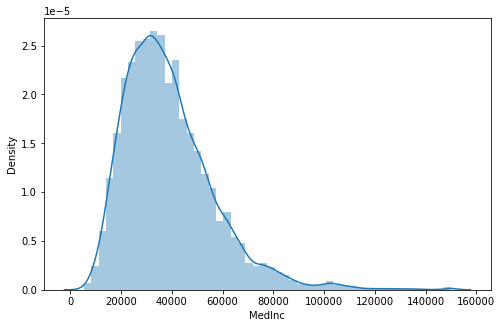

In [28]:
plt.figure(figsize=(8,5))
sns.distplot(clean_data['MedInc'],kde=True)

In [29]:
clean_data['MedInc'].median()

35900.0

Here we have a right skewed distribution with Most values between 20K and 40K with a median of 35348.0

Lets analyze the Target variable

<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

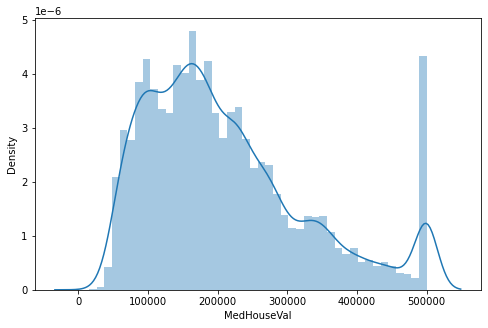

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(clean_data['MedHouseVal'],kde=True)

The above figure shows a Right skewed distribution with most values between 100K to 2K with a spike near 500K

<AxesSubplot:>

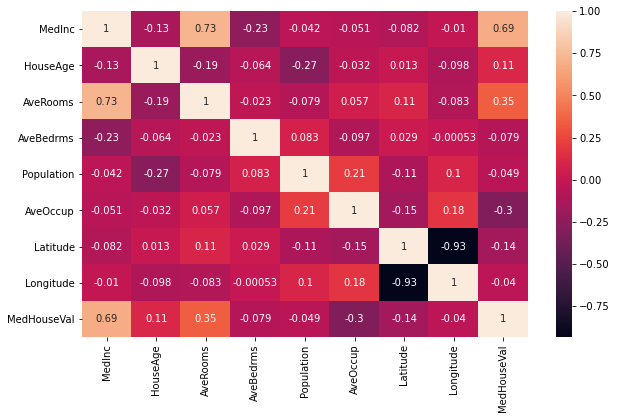

In [31]:
plt.figure(figsize = (10,6))
sns.heatmap(clean_data.corr(),annot=True)

The above heatmap shows the correlations of different features.
We can see that MedInc is highly correlated with the target variable MedHouseVal.

We should check the relation between MedInc and MedHouseVal via graphs

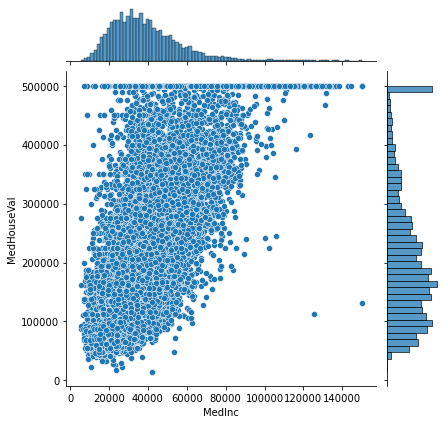

In [48]:
sns.jointplot(data = clean_data,x='MedInc',y='MedHouseVal')

From above plot we observe that MedHouseVal is increasing as MedInc is increasing


As latitude and longitude of places is given we can use a scatterplot to map out the area of california with our datapoints

We also check the distribution of population

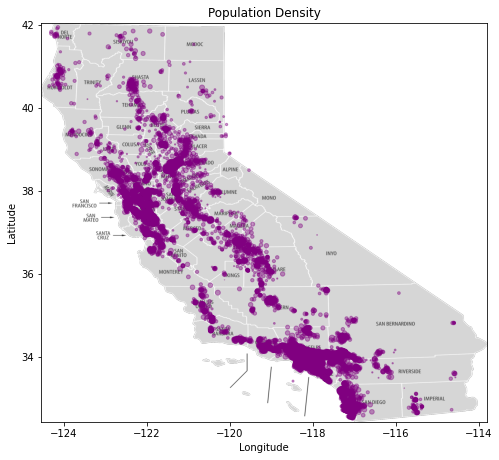

In [35]:
cal_map = plt.imread('California_county_map_(labeled).svg.png')
clean_data.plot(kind='scatter', x = 'Longitude', y='Latitude',figsize=(8,8),
                s=clean_data['Population']/100,alpha=0.4,title = 'Population Density',c='purple')

plt.imshow(cal_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.8)

In the above plot we observe the density of population. The darker areas are denser than lighter areas.

We can also see population density in and around two major Cities i.e San Fransico and Los Angeles

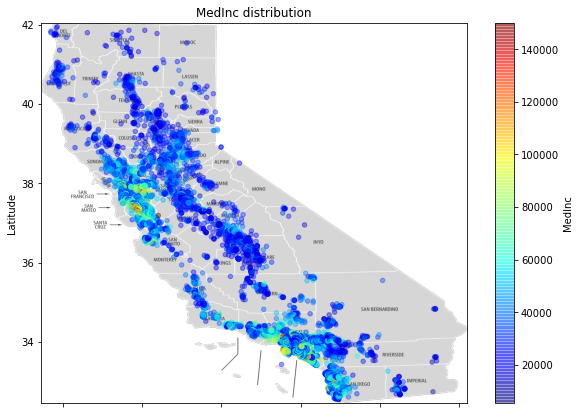

In [36]:
clean_data.plot(kind='scatter',y='Latitude',x='Longitude',figsize=(10,7),alpha = 0.4,c='MedInc',cmap='jet',
                colorbar=True,title='MedInc distribution')
plt.imshow(cal_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.8)

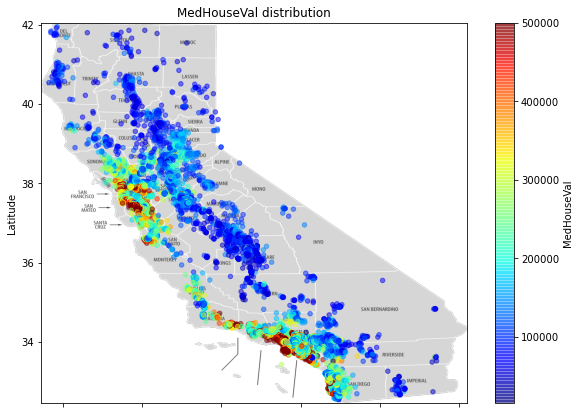

In [37]:
clean_data.plot(kind='scatter',y='Latitude',x='Longitude',figsize=(10,7),alpha = 0.5,c='MedHouseVal',cmap='jet',
                colorbar=True,title='MedHouseVal distribution')
plt.imshow(cal_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.8)

From above plot we observe that high Value houses are concentrated near big cities and near coastline